In [121]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests as req
import json
import datetime as dt

conn = sqlite3.connect('FPA_FOD_20170508.sqlite')

In [122]:
df = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE, DISCOVERY_TIME, CONT_DATE, CONT_TIME, FIPS_NAME, FIRE_SIZE FROM 'Fires' where FIRE_YEAR >= 2009 order by DISCOVERY_DATE desc", conn)

In [123]:
df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIPS_NAME,FIRE_SIZE
0,2015,Miscellaneous,33.267310,-111.997810,AZ,2457387.5,0145,2457387.5,0200,None,0.1
1,2015,Arson,35.081190,-108.782890,NM,2457387.5,1645,2457387.5,1710,None,0.3
2,2015,Fireworks,26.596500,-81.739600,FL,2457387.5,2140,2457387.5,2239,Lee,1.0
3,2015,Debris Burning,31.658725,-97.473990,TX,2457387.5,None,NaN,None,Bosque,0.1
4,2015,Debris Burning,33.295893,-96.734075,TX,2457387.5,None,NaN,None,Collin,1.0


In [124]:
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')



In [130]:
random_df=df.sample(n=10)

In [131]:
df["STATE"].value_counts().plot(kind='bar',color='red', figsize=(20,3))


In [132]:
state_df=df.loc[(df["STATE"]=="TX") |(df["STATE"]=="CA") | (df["STATE"]=="GA") | (df["STATE"]=="NY") | (df["STATE"]=="NC"),:] 

In [133]:
state_df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIPS_NAME,FIRE_SIZE
3,2015,Debris Burning,31.658725,-97.473990,TX,2015-12-31,None,NaT,None,Bosque,0.10
4,2015,Debris Burning,33.295893,-96.734075,TX,2015-12-31,None,NaT,None,Collin,1.00
5,2015,Debris Burning,32.439411,-94.947366,TX,2015-12-31,None,NaT,None,Gregg,0.25
6,2015,Debris Burning,32.116021,-96.325207,TX,2015-12-31,None,NaT,None,Navarro,0.30
7,2015,Arson,31.484142,-82.813569,GA,2015-12-31,1446,2015-12-31,1451,Coffee,0.01


In [134]:
random_df["Rain"]=""
random_df["Wind_Spd"]=""
random_df["WeatherDesc"]=""

In [135]:
key= "04e2cced184a450181130334171512" 

In [136]:
for index, row in random_df.iterrows():
    lat=row["LATITUDE"]
    lon=row["LONGITUDE"]
    date=row["DISCOVERY_DATE"]
    url = "http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=" +key  
    query= url + "&q="+ str(lat) + "," + str(lon) +  "&date=" + str(date) + "&format=json"
    weather = req.get(query).json()
    
    try:
        random_df.set_value(index,"Rain",weather["data"]["weather"][0]["hourly"][4]["precipMM"])
        random_df.set_value(index,"Wind_Spd",weather["data"]["weather"][0]['hourly'][4]['windspeedMiles'])
        random_df.set_value(index,"WeatherDesc",weather["data"]["weather"][0]['hourly'][4]['weatherDesc'][0]["value"])
        print("--", end="")
    
    except:
        continue
    
random_df.head()

--------------------

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIPS_NAME,FIRE_SIZE,Rain,Wind_Spd,WeatherDesc
478141,2009,Lightning,34.371667,-111.003333,AZ,2009-06-29,1500,2009-06-29,1700,Coconino,0.10,0.0,5,Sunny
128412,2014,Debris Burning,38.512839,-82.587881,OH,2014-03-14,None,NaT,None,Lawrence,0.25,0.0,16,Sunny
197219,2013,Arson,28.382300,-80.748400,FL,2013-03-14,2000,2013-03-17,1854,Brevard,1.40,0.0,15,Sunny
295104,2011,Lightning,31.927689,-94.681892,TX,2011-09-10,None,NaT,None,Rusk,1.00,0.0,6,Sunny
218305,2012,Lightning,38.390833,-109.113889,UT,2012-09-24,1100,2012-09-24,1321,San Juan,0.10,0.4,11,Patchy rain possible


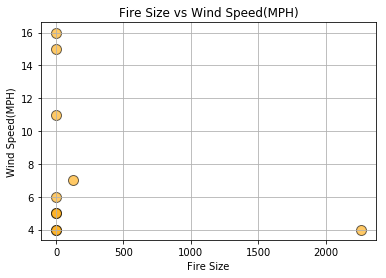

In [138]:
x_axis = random_df["FIRE_SIZE"]

plt.scatter(x_axis, random_df["Wind_Spd"],s=100,facecolors="orange",edgecolors="black",alpha=0.6)
plt.title("Fire Size vs Wind Speed(MPH)")
plt.xlabel("Fire Size")
plt.ylabel("Wind Speed(MPH)")
plt.grid("on")
plt.show()

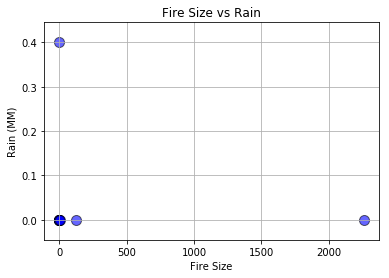

In [139]:
plt.scatter(x_axis, random_df["Rain"],s=100,facecolors="blue",edgecolors="black",alpha=0.6)
plt.title("Fire Size vs Rain")
plt.xlabel("Fire Size")
plt.ylabel("Rain (MM)")
plt.grid("on")
plt.show()

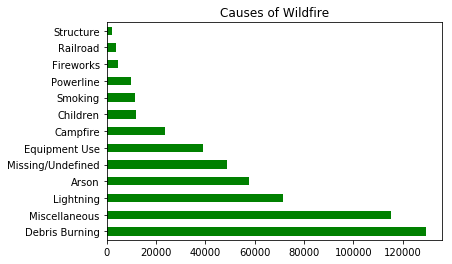

In [140]:
df["STAT_CAUSE_DESCR"].value_counts().plot(kind="barh",color="green",title="Causes of Wildfire")
plt.show()

In [141]:
lightning_df=df.loc[df["STAT_CAUSE_DESCR"]=="Lightning",:]

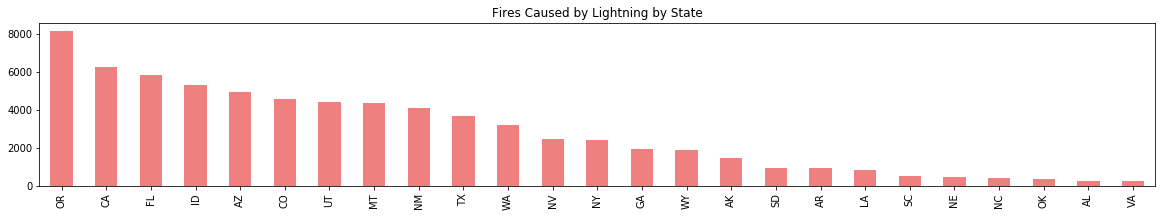

In [142]:
lightning_df["STATE"].value_counts().head(25).plot(kind="bar",color="lightcoral",title="Fires Caused by Lightning by State", figsize=(20,3))

plt.show()

In [143]:
containment_df = df[pd.notnull(df['CONT_DATE'])]

In [144]:
containment_df["CONT_TIME"]=containment_df["CONT_TIME"].astype("str")
containment_df["DISCOVERY_TIME"]=containment_df["DISCOVERY_TIME"].astype("str")
containment_df=containment_df.replace("None", np.nan)

/Users/MichaelRubio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/MichaelRubio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [145]:
containment_df = containment_df[pd.notnull(df['DISCOVERY_TIME'])]
containment_df = containment_df[pd.notnull(df['CONT_TIME'])]

/Users/MichaelRubio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/MichaelRubio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [146]:
#get dates and times in the same format to contatenate
containment_df["DISCOVERY_DATE"]=containment_df["DISCOVERY_DATE"].astype('str')
containment_df["DISCOVERY_TIME"]=containment_df["DISCOVERY_TIME"].astype('str')
containment_df["CONT_DATE"]=containment_df["CONT_DATE"].astype('str')
containment_df["CONT_TIME"]=containment_df["CONT_TIME"].astype('str')


#contatenate dates and times
containment_df["DISCOVERY_DATETIME"]=containment_df["DISCOVERY_DATE"] + ' ' + containment_df["DISCOVERY_TIME"]
containment_df["CONT_DATETIME"]=containment_df["CONT_DATE"] + ' ' + containment_df["CONT_TIME"]
containment_df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIPS_NAME,FIRE_SIZE,DISCOVERY_DATETIME,CONT_DATETIME
0,2015,Miscellaneous,33.267310,-111.997810,AZ,2015-12-31,0145,2015-12-31,0200,None,0.10,2015-12-31 0145,2015-12-31 0200
1,2015,Arson,35.081190,-108.782890,NM,2015-12-31,1645,2015-12-31,1710,None,0.30,2015-12-31 1645,2015-12-31 1710
2,2015,Fireworks,26.596500,-81.739600,FL,2015-12-31,2140,2015-12-31,2239,Lee,1.00,2015-12-31 2140,2015-12-31 2239
7,2015,Arson,31.484142,-82.813569,GA,2015-12-31,1446,2015-12-31,1451,Coffee,0.01,2015-12-31 1446,2015-12-31 1451
8,2015,Miscellaneous,37.070000,-94.640000,KS,2015-12-31,1427,2015-12-31,1444,Cherokee,1.00,2015-12-31 1427,2015-12-31 1444


In [147]:
#convert DATETIME columns to datetime formula
containment_df["DISCOVERY_DATETIME"]=pd.to_datetime(containment_df["DISCOVERY_DATETIME"], format="%Y-%m-%d %H%M")
containment_df["CONT_DATETIME"]=pd.to_datetime(containment_df["CONT_DATETIME"], format="%Y-%m-%d %H%M")
containment_df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIPS_NAME,FIRE_SIZE,DISCOVERY_DATETIME,CONT_DATETIME
0,2015,Miscellaneous,33.267310,-111.997810,AZ,2015-12-31,0145,2015-12-31,0200,None,0.10,2015-12-31 01:45:00,2015-12-31 02:00:00
1,2015,Arson,35.081190,-108.782890,NM,2015-12-31,1645,2015-12-31,1710,None,0.30,2015-12-31 16:45:00,2015-12-31 17:10:00
2,2015,Fireworks,26.596500,-81.739600,FL,2015-12-31,2140,2015-12-31,2239,Lee,1.00,2015-12-31 21:40:00,2015-12-31 22:39:00
7,2015,Arson,31.484142,-82.813569,GA,2015-12-31,1446,2015-12-31,1451,Coffee,0.01,2015-12-31 14:46:00,2015-12-31 14:51:00
8,2015,Miscellaneous,37.070000,-94.640000,KS,2015-12-31,1427,2015-12-31,1444,Cherokee,1.00,2015-12-31 14:27:00,2015-12-31 14:44:00


In [180]:
#add a column to calculate how long the fire was burning
containment_df["FIRE_DURATION"] = containment_df["CONT_DATETIME"] - containment_df["DISCOVERY_DATETIME"]

In [187]:
containment_df["FIRE_DURATION"] = containment_df["FIRE_DURATION"].astype(str)
type(containment_df["FIRE_DURATION"][0])

str

In [195]:
containment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317870 entries, 0 to 528431
Data columns (total 15 columns):
FIRE_YEAR             317870 non-null int64
STAT_CAUSE_DESCR      317870 non-null object
LATITUDE              317870 non-null float64
LONGITUDE             317870 non-null float64
STATE                 317870 non-null object
DISCOVERY_DATE        317870 non-null object
DISCOVERY_TIME        317870 non-null object
CONT_DATE             317870 non-null object
CONT_TIME             317870 non-null object
FIPS_NAME             259732 non-null object
FIRE_SIZE             317870 non-null float64
DISCOVERY_DATETIME    317870 non-null datetime64[ns]
CONT_DATETIME         317870 non-null datetime64[ns]
FIRE_DURATION         317870 non-null object
APPROX_DURATION       317870 non-null object
dtypes: datetime64[ns](2), float64(3), int64(1), object(9)
memory usage: 48.8+ MB


In [188]:
containment_df["APPROX_DURATION"] = containment_df["FIRE_DURATION"].astype(str).str[0]
containment_df

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIPS_NAME,FIRE_SIZE,DISCOVERY_DATETIME,CONT_DATETIME,FIRE_DURATION,APPROX_DURATION
0,2015,Miscellaneous,33.267310,-111.997810,AZ,2015-12-31,0145,2015-12-31,0200,None,0.10,2015-12-31 01:45:00,2015-12-31 02:00:00,0 days 00:15:00.000000000,0
1,2015,Arson,35.081190,-108.782890,NM,2015-12-31,1645,2015-12-31,1710,None,0.30,2015-12-31 16:45:00,2015-12-31 17:10:00,0 days 00:25:00.000000000,0
2,2015,Fireworks,26.596500,-81.739600,FL,2015-12-31,2140,2015-12-31,2239,Lee,1.00,2015-12-31 21:40:00,2015-12-31 22:39:00,0 days 00:59:00.000000000,0
7,2015,Arson,31.484142,-82.813569,GA,2015-12-31,1446,2015-12-31,1451,Coffee,0.01,2015-12-31 14:46:00,2015-12-31 14:51:00,0 days 00:05:00.000000000,0
8,2015,Miscellaneous,37.070000,-94.640000,KS,2015-12-31,1427,2015-12-31,1444,Cherokee,1.00,2015-12-31 14:27:00,2015-12-31 14:44:00,0 days 00:17:00.000000000,0
9,2015,Miscellaneous,39.540000,-101.670000,KS,2015-12-31,1451,2015-12-31,1610,Sherman,20.00,2015-12-31 14:51:00,2015-12-31 16:10:00,0 days 01:19:00.000000000,0
15,2015,Missing/Undefined,33.578459,-111.773692,AZ,2015-12-31,1707,2015-12-31,1800,None,0.10,2015-12-31 17:07:00,2015-12-31 18:00:00,0 days 00:53:00.000000000,0
21,2015,Arson,39.173027,-121.057377,CA,2015-12-31,2132,2015-12-31,2139,Nevada,0.01,2015-12-31 21:32:00,2015-12-31 21:39:00,0 days 00:07:00.000000000,0
22,2015,Arson,34.022640,-110.479750,AZ,2015-12-30,0205,2015-12-31,1031,None,3.00,2015-12-30 02:05:00,2015-12-31 10:31:00,1 days 08:26:00.000000000,1
23,2015,Debris Burning,31.269778,-82.483044,GA,2015-12-30,1130,2015-12-30,1154,Ware,0.01,2015-12-30 11:30:00,2015-12-30 11:54:00,0 days 00:24:00.000000000,0


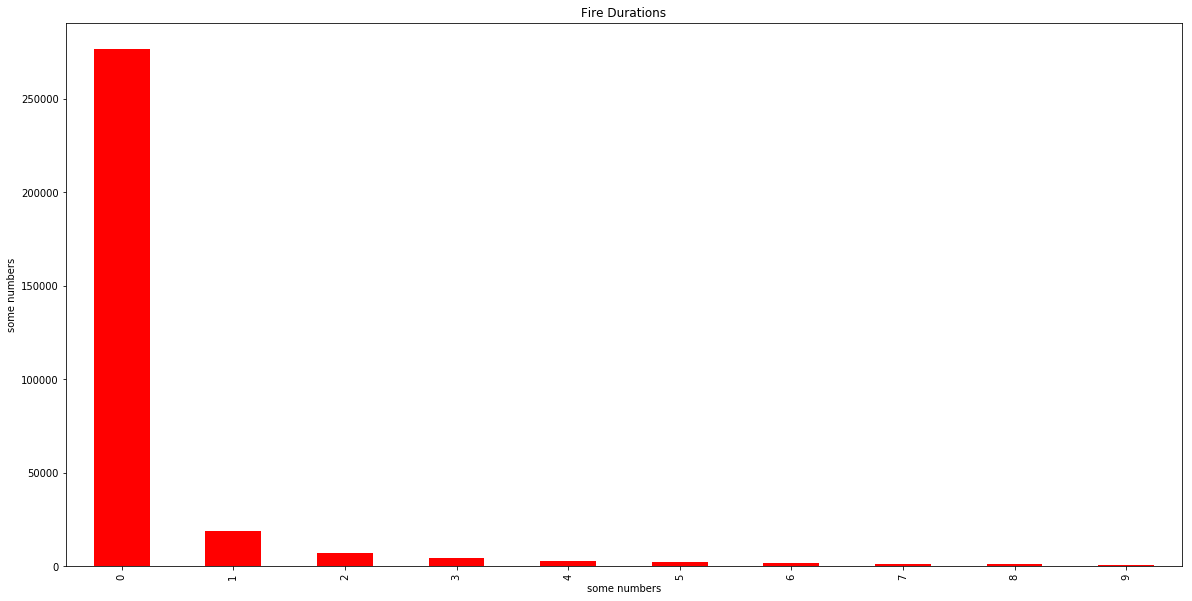

In [196]:
containment_df["APPROX_DURATION"].value_counts().plot(kind="bar",color="red",title="Fire Durations", figsize=(20,10))
plt.xlabel('Number of Fires')
plt.ylabel('Approximate Fire Durations')
plt.show()